
1) How many reviewers from each nation
a) Highest reviewers from which nationality
b) Lowest Reviewers from which nationality

2) Property with best review_score overall and least score overall

3) Do a scatter plot to show all properties over lat and long

4) Which property has highest reviews and lowest  in last 1 month of the dataset maximum date

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
path = "/content/gdrive/MyDrive/Takeo/Hotel Reviews/Hotel_Reviews.csv"
df = pd.read_csv(path)
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [5]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [6]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [7]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [8]:
# 1) How many reviewers from each nation

# Group by nationality and count reviews
review_count = df.groupby("Reviewer_Nationality")["Total_Number_of_Reviews_Reviewer_Has_Given"].count()

# sShow all answer
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
print(review_count)

Reviewer_Nationality
                       523
 Abkhazia Georgia      153
 Afghanistan             8
 Albania               286
 Algeria               100
                      ... 
 Vietnam               187
 Wallis and Futuna       2
 Yemen                  16
 Zambia                 37
 Zimbabwe               51
Name: Total_Number_of_Reviews_Reviewer_Has_Given, Length: 227, dtype: int64


In [9]:
# Count the number of reviewers for each nationality
reviewer_count = df['Reviewer_Nationality'].value_counts()

# country of highest number of reviewers
nationality_high_count = reviewer_count.idxmax()

# Number of reviewers from country
max_reviewer_count = reviewer_count.max()

#print("Reviewer count for each nationality:")
#print(reviewer_counts)

print("The nationality with the highest number of reviewers is: ",nationality_high_count)
print("Reviewers: ", max_reviewer_count)

The nationality with the highest number of reviewers is:   United Kingdom 
Reviewers:  245246


In [10]:
# b) Lowest Reviewers from which nationality

reviewer_count = df['Reviewer_Nationality'].value_counts()

nationality_low_count = reviewer_count.idxmin()
min_reviewer_count = reviewer_count.min()

print("The nationality with the lowest number of reviewers is: ",nationality_low_count)
print("Reviewers: ", min_reviewer_count)

The nationality with the lowest number of reviewers is:   Svalbard Jan Mayen 
Reviewers:  1


In [11]:
# 2.Property with best review_score overall and least score overall

# Group by hotel names and find the maximum, min review score for each hotel
best_scores_by_hotel = df.groupby("Hotel_Name")["Average_Score"].max()
worst_scores_by_hotel = df.groupby("Hotel_Name")["Average_Score"].min()

# max score
best_hotel = best_scores_by_hotel.idxmax()
best_review_score = best_scores_by_hotel.max()

# Min Score
worst_hotel = best_scores_by_hotel.idxmin()
worst_review_score = best_scores_by_hotel.min()

print(f"The property with the lowest review score overall is {worst_hotel} with a score of {worst_review_score} out of 10.")
print(f"The property with the best review score overall is {best_hotel} with a score of {best_review_score} out of 10.")

The property with the lowest review score overall is Hotel Liberty with a score of 5.2 out of 10.
The property with the best review score overall is Ritz Paris with a score of 9.8 out of 10.


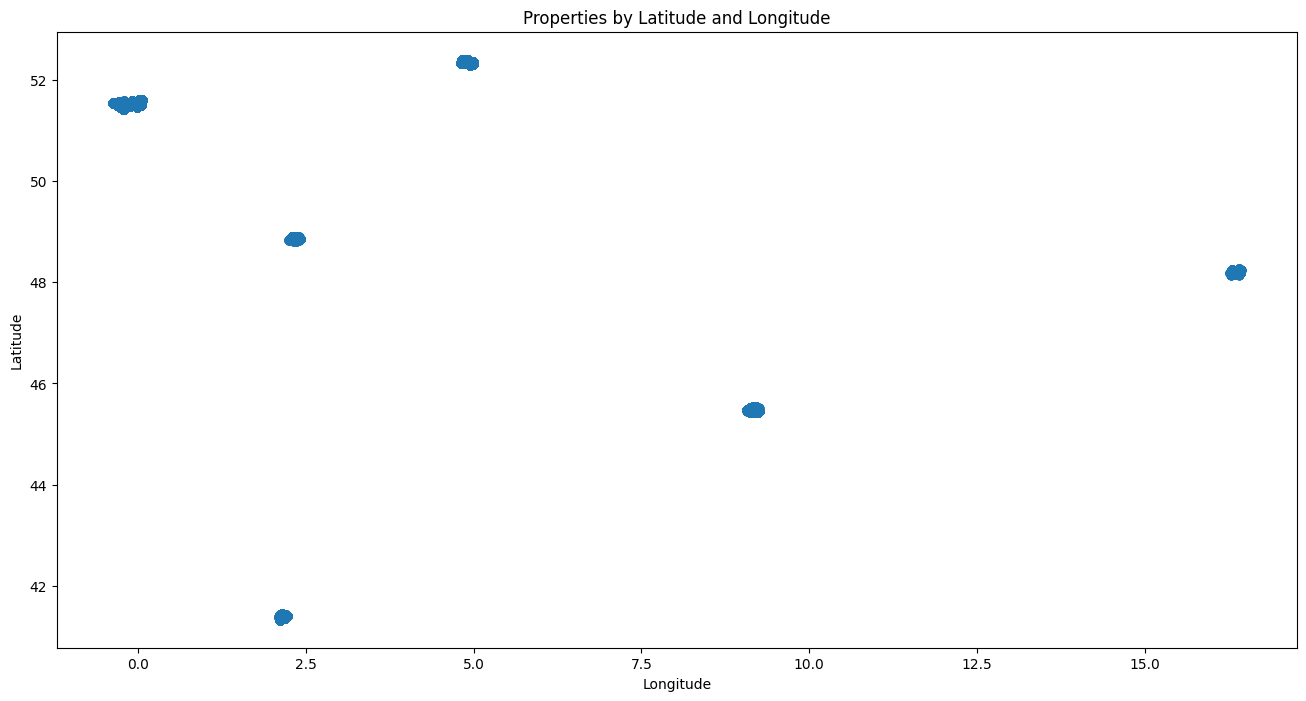

In [12]:
# 3) Do a scatter plot to show all properties over lat and long

# Extract latitude and longitude columns from the DataFrame
latitudes = df['lat']
longitudes = df['lng']

plt.figure(figsize=(16, 8))
plt.scatter(longitudes, latitudes, alpha=0.5)
plt.title("Properties by Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [13]:
# 4) Which property has highest reviews and lowest  in last 1 month of the
# dataset maximum date

# Convert "Review_Date" to datetime data type
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

# Find the maximum date in the dataset
max_date = df['Review_Date'].max()

# Calculate the date one month ago from the maximum date
one_month_ago = max_date - pd.DateOffset(months=1)

# Filter the data for reviews within the last month
recent_reviews = df[df['Review_Date'] >= one_month_ago]

# Group by hotel names and count the reviews for each hotel
review_counts = recent_reviews['Hotel_Name'].value_counts()

# Find the hotel with the highest and lowest review counts
hotel_with_highest_reviews = review_counts.idxmax()
hotel_with_lowest_reviews = review_counts.idxmin()

# Get the review counts for the highest and lowest hotels
highest_review_count = review_counts.max()
lowest_review_count = review_counts.min()

# Print the results
print(f"The property with the highest reviews in the last 1 month is {hotel_with_highest_reviews} with {highest_review_count} reviews.")
print(f"The property with the lowest reviews in the last 1 month is {hotel_with_lowest_reviews} with {lowest_review_count} reviews.")

The property with the highest reviews in the last 1 month is Park Plaza Westminster Bridge London with 195 reviews.
The property with the lowest reviews in the last 1 month is The Berkeley with 1 reviews.


In [14]:
# Taking the first row and concatenating positive and negative review to one variable
int_row = int(input("Enter the row index:"))

# Get the first row 0th index
the_row = df.iloc[int_row]
print("Positive_Review")
print(the_row["Positive_Review"])
print("Negative_Review")
print(the_row["Negative_Review"])
print()
concat_review = the_row["Positive_Review"] + the_row["Negative_Review"]
print("Concatenated Review")
print(concat_review)

Enter the row index:0
Positive_Review
 Only the park outside of the hotel was beautiful 
Negative_Review
 I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to 

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
# Tokenize the concatenated words
# word_tokenize is a function here where it is going to tokenize the combined reviews in to words
words = word_tokenize(concat_review)

print("Tokenized Words:")
print(words)

Tokenized Words:
['Only', 'the', 'park', 'outside', 'of', 'the', 'hotel', 'was', 'beautiful', 'I', 'am', 'so', 'angry', 'that', 'i', 'made', 'this', 'post', 'available', 'via', 'all', 'possible', 'sites', 'i', 'use', 'when', 'planing', 'my', 'trips', 'so', 'no', 'one', 'will', 'make', 'the', 'mistake', 'of', 'booking', 'this', 'place', 'I', 'made', 'my', 'booking', 'via', 'booking', 'com', 'We', 'stayed', 'for', '6', 'nights', 'in', 'this', 'hotel', 'from', '11', 'to', '17', 'July', 'Upon', 'arrival', 'we', 'were', 'placed', 'in', 'a', 'small', 'room', 'on', 'the', '2nd', 'floor', 'of', 'the', 'hotel', 'It', 'turned', 'out', 'that', 'this', 'was', 'not', 'the', 'room', 'we', 'booked', 'I', 'had', 'specially', 'reserved', 'the', '2', 'level', 'duplex', 'room', 'so', 'that', 'we', 'would', 'have', 'a', 'big', 'windows', 'and', 'high', 'ceilings', 'The', 'room', 'itself', 'was', 'ok', 'if', 'you', 'don', 't', 'mind', 'the', 'broken', 'window', 'that', 'can', 'not', 'be', 'closed', 'hello'

In [17]:
# Tokenize the combined reviews into sentences
# sent_tokenize is a function that is going to tokenize the combined review into sentence
sentences = sent_tokenize(concat_review)

print("Tokenized Sentences:")
for sentence in sentences:
    print(sentence)

Tokenized Sentences:
 Only the park outside of the hotel was beautiful  I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o

In [18]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


# Download NLTK data for tokenization and stemming
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
# Applying stemming for the concatenated sentence
# Tokenize the combined review into sentences
sentences = sent_tokenize(concat_review)

# Create a Porter Stemmer instance
stemmer = PorterStemmer()

# Tokenize each sentence into words and apply stemming
stemmed_sentences = []
for sentence in sentences:
    words = word_tokenize(sentence)
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_sentence = " ".join(stemmed_words)
    stemmed_sentences.append(stemmed_sentence)

# Print the tokenized and stemmed sentences
print("Tokenized and Stemmed Sentences:")
for stemmed_sentence in stemmed_sentences:
    print(stemmed_sentence)

Tokenized and Stemmed Sentences:
onli the park outsid of the hotel wa beauti i am so angri that i made thi post avail via all possibl site i use when plane my trip so no one will make the mistak of book thi place i made my book via book com we stay for 6 night in thi hotel from 11 to 17 juli upon arriv we were place in a small room on the 2nd floor of the hotel it turn out that thi wa not the room we book i had special reserv the 2 level duplex room so that we would have a big window and high ceil the room itself wa ok if you don t mind the broken window that can not be close hello rain and a mini fridg that contain some sort of a bio weapon at least i guess so by the smell of it i intim ask to chang the room and after explain 2 time that i book a duplex btw it cost the same as a simpl doubl but got way more volum due to the high ceil wa offer a room but onli the next day so i had to check out the next day befor 11 o clock in order to get the room i wane to not the best way to begin yo

In [20]:
# Applying lemmatizer for the concatenated sentence
# Tokenize the combined review into sentences
sentences = sent_tokenize(concat_review)

# Create a WordNet Lemmatizer instance
lemmatizer = WordNetLemmatizer()

# Tokenize each sentence into words and apply lemmatization
lemmatized_sentences = []
for sentence in sentences:
    words = word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_sentence = " ".join(lemmatized_words)
    lemmatized_sentences.append(lemmatized_sentence)

# Output
print("Tokenized and Lemmatized Sentences:")
for lemmatized_sentence in lemmatized_sentences:
    print(lemmatized_sentence)

Tokenized and Lemmatized Sentences:
Only the park outside of the hotel wa beautiful I am so angry that i made this post available via all possible site i use when planing my trip so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 night in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this wa not the room we booked I had specially reserved the 2 level duplex room so that we would have a big window and high ceiling The room itself wa ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 time that i booked a duplex btw it cost the same a a simple double but got way more volume due to the high ceiling wa offered a room but only the next day SO i had to check out the next day before 11 

[Concatenate negative reviews and positive reviews together in a new column.
](https://)
Cleaning to be done on the column


# 1) Lower Case that column

2) Remove Stop words

3) Remove punctuations

4) Apply Lemmitization/Stemming (Check accuracy with both)

5) Apply TFIDF/Count vectorizer

6) Apply model on target column Reviewer_Score

Compare results for both TF/IDF and Count vectorizer

Cleaning is needed for case where No negative or No Positive review is given check for this

In [21]:
# Concatenate negative reviews and positive reviews together in a new column.

df['Combined_Reviews'] = df['Negative_Review'] + ' ' + df['Positive_Review']
print(df.head())

                                       Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194  2017-08-03            7.7  Hotel Arena   
1                           194  2017-08-03            7.7  Hotel Arena   
2                           194  2017-07-31            7.7  Hotel Arena   
3                           194  2017-07-31            7.7  Hotel Arena   
4                           194  2017-07-24            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                     

In [22]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# 1) Lower Case that column
df['Combined_Reviews'] = df['Combined_Reviews'].str.lower()
# df

In [ ]:
# 2) Remove Stop words

# First move getting the first set of English Stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  words = word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return ''.join(filtered_words)

df['Combined_Reviews'] = df['Combined_Reviews'].apply(remove_stopwords)
df

In [ ]:
# 3) Remove punctuations
import re
# Function to remove punctuation from text
def remove_punctuation(text):
    # Use regular expressions to remove punctuation (including hyphens and apostrophes)
    return re.sub(r'[^\w\s]', '', text)

# Apply the remove_punctuation function to the 'Combined_Reviews' column
df['Combined_Reviews'] = df['Combined_Reviews'].apply(remove_punctuation)
df

In [ ]:
# 4) Apply Lemmitization/Stemming (Check accuracy with both)
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download NLTK data for stop words and word tokenization
nltk.download('stopwords')
nltk.download('punkt')

# Get the set of English stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words from a text
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'Combined_Reviews' column
df['Combined_Reviews'] = df['Combined_Reviews'].apply(remove_stopwords)

# Function to apply lemmatization to a text
def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Function to apply stemming to a text
def apply_stemming(text):
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply lemmatization to the 'Combined_Reviews' column
df['Lemmatized_Reviews'] = df['Combined_Reviews'].apply(apply_lemmatization)

# Apply stemming to the 'Combined_Reviews' column
df['Stemmed_Reviews'] = df['Combined_Reviews'].apply(apply_stemming)

# Display the DataFrame with Lemmatized and Stemmed columns
print(df[['Combined_Reviews', 'Lemmatized_Reviews', 'Stemmed_Reviews']])

In [30]:
# 5) Apply TFIDF/Count vectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Assuming you have columns 'Combined_Reviews', 'Lemmatized_Reviews', and 'Stemmed_Reviews' in your DataFrame
# If not, create them using df['Combined_Reviews'], df['Lemmatized_Reviews'], and df['Stemmed_Reviews'] = ...

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features (words) as needed

# Create a Count Vectorizer
count_vectorizer = CountVectorizer(max_features=1000)  # You can adjust the number of features (words) as needed

# Apply TF-IDF and Count Vectorization to the text data
tfidf_matrix_combined = tfidf_vectorizer.fit_transform(df['Combined_Reviews'])
count_matrix_combined = count_vectorizer.fit_transform(df['Combined_Reviews'])

tfidf_matrix_lemmatized = tfidf_vectorizer.fit_transform(df['Lemmatized_Reviews'])
count_matrix_lemmatized = count_vectorizer.fit_transform(df['Lemmatized_Reviews'])

tfidf_matrix_stemmed = tfidf_vectorizer.fit_transform(df['Stemmed_Reviews'])
count_matrix_stemmed = count_vectorizer.fit_transform(df['Stemmed_Reviews'])

# Convert the TF-IDF and Count Vectorization results to DataFrames
tfidf_df_combined = pd.DataFrame(tfidf_matrix_combined.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
count_df_combined = pd.DataFrame(count_matrix_combined.toarray(), columns=count_vectorizer.get_feature_names_out())

tfidf_df_lemmatized = pd.DataFrame(tfidf_matrix_lemmatized.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
count_df_lemmatized = pd.DataFrame(count_matrix_lemmatized.toarray(), columns=count_vectorizer.get_feature_names_out())

tfidf_df_stemmed = pd.DataFrame(tfidf_matrix_stemmed.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
count_df_stemmed = pd.DataFrame(count_matrix_stemmed.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the DataFrames with TF-IDF and Count Vectorization results
print("TF-IDF for Combined Reviews:")
print(tfidf_df_combined)
print("\nCount Vectorization for Combined Reviews:")
print(count_df_combined)

print("\nTF-IDF for Lemmatized Reviews:")
print(tfidf_df_lemmatized)
print("\nCount Vectorization for Lemmatized Reviews:")
print(count_df_lemmatized)

print("\nTF-IDF for Stemmed Reviews:")
print(tfidf_df_stemmed)
print("\nCount Vectorization for Stemmed Reviews:")
print(count_df_stemmed)

TF-IDF for Combined Reviews:
        acposit  airconditionerposit  airconditioningloc  \
0           0.0                  0.0                 0.0   
1           0.0                  0.0                 0.0   
2           0.0                  0.0                 0.0   
3           0.0                  0.0                 0.0   
4           0.0                  0.0                 0.0   
...         ...                  ...                 ...   
515733      0.0                  0.0                 0.0   
515734      0.0                  0.0                 0.0   
515735      0.0                  0.0                 0.0   
515736      0.0                  0.0                 0.0   
515737      0.0                  0.0                 0.0   

        airconditioningposit  airconditionloc  airconditionposit  airconposit  \
0                        0.0              0.0                0.0          0.0   
1                        0.0              0.0                0.0          0.0   
2      

In [31]:
# 6) convert Reviewer_Score(target column ) to integer from 0-10 and apply classification algorithms on it.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already loaded your DataFrame
# For example: df = pd.read_csv("your_data.csv")

# 1. Convert 'Reviewer_Score' to integers from 0 to 10
label_encoder = LabelEncoder()
df['Reviewer_Score'] = label_encoder.fit_transform(df['Reviewer_Score'])

# 2. Define features and target variable
X = df[['Average_Score']]  # You can use other features if needed
y = df['Reviewer_Score']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Apply classification algorithms (e.g., Decision Tree and Random Forest)
# Initialize and train a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

# Predict using the Decision Tree classifier
y_pred_decision_tree = decision_tree_classifier.predict(X_test)

# Initialize and train a Random Forest classifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

# Predict using the Random Forest classifier
y_pred_random_forest = random_forest_classifier.predict(X_test)

# Calculate accuracy scores
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

print(f"Accuracy (Decision Tree): {accuracy_decision_tree:.2f}")
print(f"Accuracy (Random Forest): {accuracy_random_forest:.2f}")


Accuracy (Decision Tree): 0.23
Accuracy (Random Forest): 0.23


In [33]:
# 7) Apply model on target column Reviewer_Score Compare results for both TF/IDF and Count vectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame with 'Reviewer_Score' and 'Combined_Reviews' column
# If not, you can adjust the column names accordingly

# Create a function to evaluate the model
def evaluate_model(vectorizer, X_train, X_test, y_train, y_test):
    # Create the vectorizer (either TF-IDF or Count Vectorizer)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Initialize and train a classifier (Random Forest, for example)
    classifier = RandomForestClassifier()
    classifier.fit(X_train_vectorized, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test_vectorized)

    # Calculate and return the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Load your DataFrame or adjust the data loading process
# df = pd.read_csv("your_data.csv")

# Split the data into features (text data) and the target variable
X = df['Combined_Reviews']
y = df['Reviewer_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features (words) as needed

# Initialize Count Vectorizer
count_vectorizer = CountVectorizer(max_features=1000)  # You can adjust the number of features (words) as needed

# Evaluate models using TF-IDF and Count Vectorizer and compare results
accuracy_tfidf = evaluate_model(tfidf_vectorizer, X_train, X_test, y_train, y_test)
accuracy_count = evaluate_model(count_vectorizer, X_train, X_test, y_train, y_test)

print(f"Accuracy with TF-IDF: {accuracy_tfidf:.2f}")
print(f"Accuracy with Count Vectorizer: {accuracy_count:.2f}")


Accuracy with TF-IDF: 0.22
Accuracy with Count Vectorizer: 0.22
